In [20]:
import graphlab

In [21]:
sales = graphlab.SFrame('house_sales.gl/')

In [8]:
import numpy as np 

In [40]:
def get_numpy_data(data_sframe,features,output):
    data_sframe['constant'] = 1
    features = ['constant'] + features  
    features_sarray = data_sframe[features] 
    feature_matrix = features_sarray.to_numpy() 
    output_sarray = data_sframe[output]
    output_matrix = output_sarray.to_numpy()
    return (feature_matrix,output_matrix)

In [10]:
def predict_output(features_matrix,weights):
    predictions = np.dot(features_matrix,weights)
    return predictions

In [41]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if feature_is_constant is True:
        derivative = 2 * np.dot(errors,feature)
    else:
        derivative = 2 * np.dot(errors,feature) + 2 * l2_penalty*weight
    return derivative

In [42]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price') 
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights) 
errors = test_predictions - example_output 

print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.
print ''

print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2.

-5.65541667824e+13
-5.65541667824e+13

-22446749336.0
-22446749336.0


In [121]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations):
    print 'Starting gradient descent with l2_penalty = ' + str(l2_penalty)
    
    weights = np.array(initial_weights) 
    iteration = 0 
    print_frequency = 1 
    
    while iteration != max_iterations:
        iteration += 1  
        if iteration == 10:
            print_frequency = 10
        if iteration == 100:
            print_frequency = 100
        if iteration%print_frequency==0:
            print('Iteration = ' + str(iteration))

        predictions = predict_output(feature_matrix,weights)
        errors = predictions - output
        if iteration%print_frequency==0:
            print "weights : ",weights
            print 'Cost function = ', str(np.dot(errors,errors) + l2_penalty*(np.dot(weights,weights) - weights[0]**2))
        
        for i in xrange(len(weights)): 
            if i==0:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, True)
            else:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, False)
                    
            weights[i] = weights[i] - step_size * derivative
            
    print 'Done with gradient descent at iteration ', iteration
    print 'Learned weights = ', str(weights)
    return weights

In [56]:
simple_features = ['sqft_living']
my_output = 'price'

In [57]:
train_data,test_data = sales.random_split(.8,seed=0)

In [118]:
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [119]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

In [122]:
l2_penalty = 0.0
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)
print simple_weights_0_penalty

Starting gradient descent with l2_penalty = 0.0
Iteration = 1
weights :  [ 0.  0.]
Cost function =  7.43305185103e+15
Iteration = 2
weights :  [  1.87526989e-02   4.73325137e+01]
Cost function =  5.39426721314e+15
Iteration = 3
weights :  [  3.40823824e-02   8.61473080e+01]
Cost function =  4.0232377365e+15
Iteration = 4
weights :  [  4.66050390e-02   1.17977189e+02]
Cost function =  3.10125618392e+15
Iteration = 5
weights :  [  5.68258070e-02   1.44079125e+02]
Cost function =  2.48124764451e+15
Iteration = 6
weights :  [  6.51589227e-02   1.65483889e+02]
Cost function =  2.06430807789e+15
Iteration = 7
weights :  [  7.19440783e-02   1.83036761e+02]
Cost function =  1.78392709737e+15
Iteration = 8
weights :  [  7.74598370e-02   1.97430906e+02]
Cost function =  1.59537820315e+15
Iteration = 9
weights :  [  8.19346329e-02   2.09234754e+02]
Cost function =  1.46858399105e+15
Iteration = 10
weights :  [  8.55557925e-02   2.18914442e+02]
Cost function =  1.38331819148e+15
Iteration = 20
wei

In [66]:
l2_penalty = 1e11
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

Starting gradient descent with l2_penalty = 1e+11
Iteration = 1
Cost function =  7.43305185103e+15
Iteration = 2
Cost function =  5.61830389841e+15
Iteration = 3
Cost function =  4.92061327812e+15
Iteration = 4
Cost function =  4.65238194261e+15
Iteration = 5
Cost function =  4.54925876401e+15
Iteration = 6
Cost function =  4.50961239088e+15
Iteration = 7
Cost function =  4.49437005028e+15
Iteration = 8
Cost function =  4.48850998403e+15
Iteration = 9
Cost function =  4.48625698853e+15
Iteration = 10
Cost function =  4.48539075267e+15
Iteration = 20
Cost function =  4.48484886803e+15
Iteration = 30
Cost function =  4.48484788048e+15
Iteration = 40
Cost function =  4.48484693108e+15
Iteration = 50
Cost function =  4.48484598169e+15
Iteration = 60
Cost function =  4.48484503229e+15
Iteration = 70
Cost function =  4.4848440829e+15
Iteration = 80
Cost function =  4.48484313351e+15
Iteration = 90
Cost function =  4.48484218411e+15
Iteration = 100
Cost function =  4.48484123472e+15
Iteration

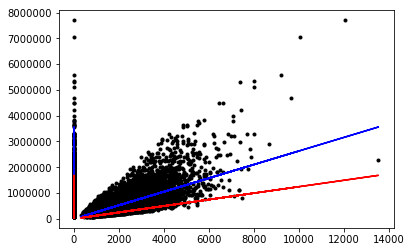

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [78]:
RSS_0_weight = sum((predict_output(simple_test_feature_matrix,initial_weights) - test_output)**2)
print RSS_0_weight

1.78427328252e+15


In [76]:
RSS_0_no_pe = sum((predict_output(simple_test_feature_matrix,simple_weights_0_penalty) - test_output)**2)
print RSS_0_no_pe 

2.75723634598e+14


In [77]:
RSS_with_pe = sum((predict_output(simple_test_feature_matrix,simple_weights_high_penalty)- test_output)**2)
print RSS_with_pe

6.94642100914e+14


In [95]:
model_features = ['sqft_living', 'sqft_living15'] 
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [92]:
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000
print initial_weights

[ 0.  0.  0.]


In [96]:
l2_penalty = 0.0
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

Starting gradient descent with l2_penalty = 0.0
Iteration = 1
Cost function =  7.43305185103e+15
Iteration = 2
Cost function =  4.0567523315e+15
Iteration = 3
Cost function =  2.52956511433e+15
Iteration = 4
Cost function =  1.83855669428e+15
Iteration = 5
Cost function =  1.52567557521e+15
Iteration = 6
Cost function =  1.38378949867e+15
Iteration = 7
Cost function =  1.31923260628e+15
Iteration = 8
Cost function =  1.28964887203e+15
Iteration = 9
Cost function =  1.27588472408e+15
Iteration = 10
Cost function =  1.26927880758e+15
Iteration = 20
Cost function =  1.25781238632e+15
Iteration = 30
Cost function =  1.25195457127e+15
Iteration = 40
Cost function =  1.24675542316e+15
Iteration = 50
Cost function =  1.24213950875e+15
Iteration = 60
Cost function =  1.23804140114e+15
Iteration = 70
Cost function =  1.23440301346e+15
Iteration = 80
Cost function =  1.23117277498e+15
Iteration = 90
Cost function =  1.22830490006e+15
Iteration = 100
Cost function =  1.22575873926e+15
Iteration =

In [97]:
l2_penalty = 1e11
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

Starting gradient descent with l2_penalty = 1e+11
Iteration = 1
Cost function =  7.43305185103e+15
Iteration = 2
Cost function =  4.46048979029e+15
Iteration = 3
Cost function =  3.79667446884e+15
Iteration = 4
Cost function =  3.64831953044e+15
Iteration = 5
Cost function =  3.61509110322e+15
Iteration = 6
Cost function =  3.60760274251e+15
Iteration = 7
Cost function =  3.60588632216e+15
Iteration = 8
Cost function =  3.60547487453e+15
Iteration = 9
Cost function =  3.60536516777e+15
Iteration = 10
Cost function =  3.60532940218e+15
Iteration = 20
Cost function =  3.60529428102e+15
Iteration = 30
Cost function =  3.60529353727e+15
Iteration = 40
Cost function =  3.60529308275e+15
Iteration = 50
Cost function =  3.60529263111e+15
Iteration = 60
Cost function =  3.60529217949e+15
Iteration = 70
Cost function =  3.60529172788e+15
Iteration = 80
Cost function =  3.60529127626e+15
Iteration = 90
Cost function =  3.60529082465e+15
Iteration = 100
Cost function =  3.60529037303e+15
Iteratio

In [98]:
rss_0_weight = sum((predict_output(test_feature_matrix,initial_weights) - test_output)**2)
print rss_0_weight

1.78427328252e+15


In [102]:
rss_no_pena = sum((predict_output(test_feature_matrix,multiple_weights_0_penalty) - test_output)**2)
print rss_no_pena

2.74067618287e+14


In [101]:
rss_with_pena = sum((predict_output(test_feature_matrix,multiple_weights_high_penalty) - test_output)**2)
print rss_with_pena

5.0040480058e+14


In [113]:
predicting_1st_House = predict_output(test_feature_matrix[0:,],multiple_weights_0_penalty)
print predicting_1st_House[0]
print test_output[0]

387465.476465
310000.0


In [114]:
predicting_1st_House = predict_output(test_feature_matrix[0:,],multiple_weights_high_penalty)
print predicting_1st_House[0]
print test_output[0]

270453.530305
310000.0
